In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

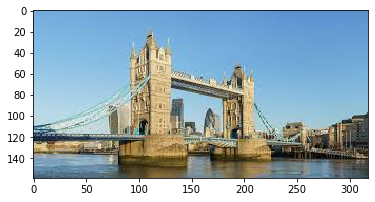

In [2]:
img=cv2.imread(r"D:\tower bridge london.jfif")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
original_img=img
plt.show()

In [3]:
print(img.shape)

(159, 318, 3)


In [4]:
#Flatteing to get each channel(1-graycale and 3 for rgb) of  image in form of linear array
all_pixels=img.reshape((159*318,3))


In [5]:
print(all_pixels.shape)

(50562, 3)


In [6]:
from sklearn.cluster import KMeans

In [7]:
dominant_colors=5
kn=KMeans(n_clusters=dominant_colors)
kn.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
centers=kn.cluster_centers_

In [9]:
centers=np.array(centers,dtype="uint8")
#A uint8 data type contains all whole numbers from 0 to 255 majorly used in graphics and are always non negative

In [10]:
print(centers)

[[114 168 214]
 [124 121 102]
 [161 201 220]
 [ 64  60  43]
 [197 181 143]]


# Plotting the colors

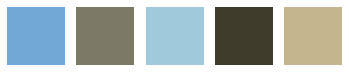

In [11]:
i=1
colors=[]
for each_col in centers:
    plt.subplot(1,5,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    
     # color swatch 
    a = np.zeros((100,100,3), dtype='uint8')
    a[:, :, :] = each_col
    plt.imshow(a)
    
plt.show()

# Segmenting our original image.

In [12]:
new_img=np.zeros((159*318,3),dtype="uint8")
print(new_img.shape)

(50562, 3)


In [13]:
a = kn.labels_
print(len(a))
colors

50562


[array([114, 168, 214], dtype=uint8),
 array([124, 121, 102], dtype=uint8),
 array([161, 201, 220], dtype=uint8),
 array([64, 60, 43], dtype=uint8),
 array([197, 181, 143], dtype=uint8)]

In [14]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[kn.labels_[ix]]
new_img = new_img.reshape((original_img.shape))    

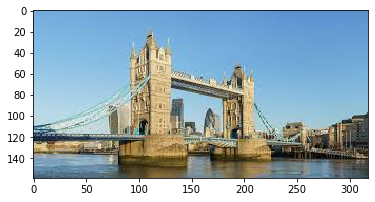

In [15]:

plt.imshow(original_img)
plt.show()

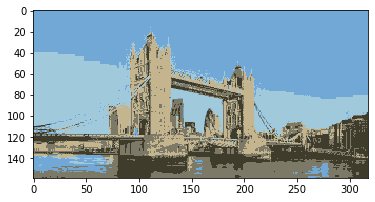

In [16]:
plt.imshow(new_img)
plt.show()